Introduction:
            

In this study, we analyzed a text-based dataset with sentiment labels, following three main steps: data preprocessing,Transformation and visualization.

First, we cleaned and normalized the data to ensure consistency. Then, we explored the dataset using visualizations such as boxplots, bar charts,lineplot and scatterplot to identify trends and relationships.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("sentimentdataset.csv")
print(df.to_string())

     Unnamed: 0.1  Unnamed: 0                                                                                                                                                           Text               Sentiment            Timestamp                                     User     Platform                                           Hashtags  Retweets  Likes               Country  Year  Month  Day  Hour
0               0           0                                                                                                            Enjoying a beautiful day at the park!                            Positive    2023-01-15 12:30:00                            User123          Twitter            #Nature #Park                                  15.0   30.0             USA        2023      1   15    12
1               1           1                                                                                                            Traffic was terrible this morning.                         

Data Overview

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20
731,732,736,Organizing a virtual talent show during challe...,Happy,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24.0,47.0,USA,2020,11,15,15


In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [7]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [8]:
print((df.isna()).sum())

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [9]:
print("Duplicated values",df.duplicated())

Duplicated values 0      False
1      False
2      False
3      False
4      False
       ...  
727    False
728    False
729    False
730    False
731    False
Length: 732, dtype: bool


In [10]:
df.shape

(732, 15)

Data Cleaning

In [11]:
#Strip whitespace around each platform name
#Capitalize the first letter and lowercase the rest
df['Sentiment'] = df['Sentiment'].str.strip()
df['Platform'] = df['Platform'].str.strip().str.capitalize()

In [12]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [13]:
df=df.drop(columns=["Year","Month","Day","Hour"])

In [14]:
df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia
...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK


In [15]:
# Check for missing values
df.isnull().sum()

,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0
Country,0


In [16]:
print(df["Timestamp"])

0      2023-01-15 12:30:00
1      2023-01-15 08:45:00
2      2023-01-15 15:45:00
3      2023-01-15 18:20:00
4      2023-01-15 19:55:00
              ...         
727    2017-08-18 18:20:00
728    2018-06-22 14:15:00
729    2019-04-05 17:30:00
730    2020-02-29 20:45:00
731    2020-11-15 15:15:00
Name: Timestamp, Length: 732, dtype: object


In [17]:
# Convert Timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')
df["Timestamp"]

,Timestamp
0,2023-01-15 12:30:00
1,2023-01-15 08:45:00
2,2023-01-15 15:45:00
3,2023-01-15 18:20:00
4,2023-01-15 19:55:00
...,...
727,2017-08-18 18:20:00
728,2018-06-22 14:15:00
729,2019-04-05 17:30:00
730,2020-02-29 20:45:00


In [18]:
# Drop null timestamps and duplicates
df = df.dropna(subset=["Timestamp"])
df = df.drop_duplicates()

In [19]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [20]:
df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia
...,...,...,...,...,...,...,...,...,...
706,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK
707,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA
708,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada
709,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK


In [21]:
df.shape

(711, 9)

In [22]:
# Export dataframe to csv:
df.to_csv("sentimentdataset1.csv")

In [23]:
df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia
...,...,...,...,...,...,...,...,...,...
706,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK
707,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA
708,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada
709,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK


Exploratory Data Analysis

Sentiment Distribution, only the top 20 most used sentiments for improve the visualization

<ipython-input-24-053553ad3608>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sentiments.index, y=top_sentiments.values, palette="viridis")


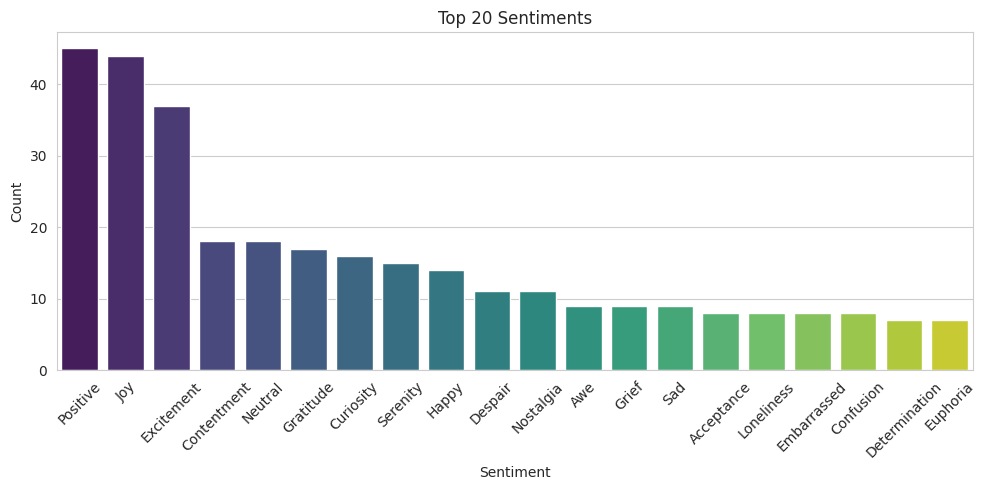

In [24]:
# Set Seaborn style
sns.set_style("whitegrid")

# Get top 20 most frequent sentiments
top_sentiments = df["Sentiment"].value_counts().head(20)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_sentiments.index, y=top_sentiments.values, palette="viridis")

plt.title("Top 20 Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Posts by Platform

<ipython-input-25-32192c3cdc5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Platform"], palette="pastel")


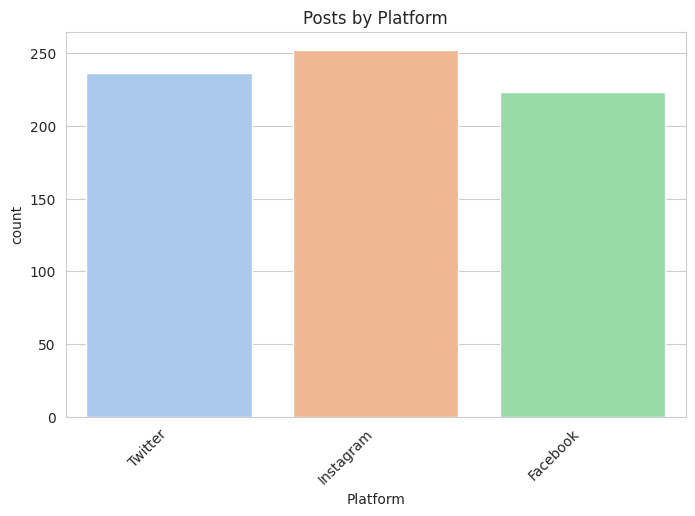

In [25]:
plt.figure(figsize=(8, 5))

sns.countplot(x=df["Platform"], palette="pastel")
plt.title("Posts by Platform")
plt.xticks(rotation=45, ha="right")

plt.show()

Likes by Sentiment (Positive and Negative)

<ipython-input-26-108a8d557ec7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Likes', data=df_filtered, palette={'Positive': 'green', 'Negative': 'red'})


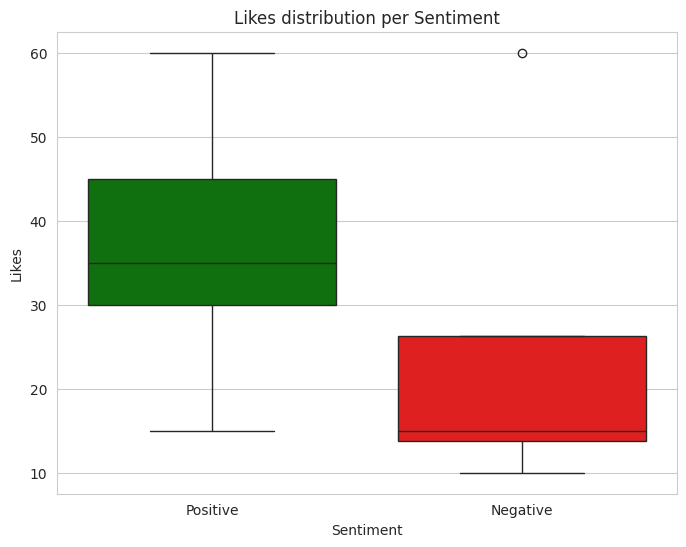

In [26]:
# Filter sentiments "Positive" and "Negative"
df_filtered = df[df['Sentiment'].isin(['Positive', 'Negative'])]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Likes', data=df_filtered, palette={'Positive': 'green', 'Negative': 'red'})

plt.title('Likes distribution per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Likes')

plt.show()

Average Likes per hour

<ipython-input-27-eb5ad52ec04a>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['Hour'], y=df['Likes'], estimator='mean', ci=None)


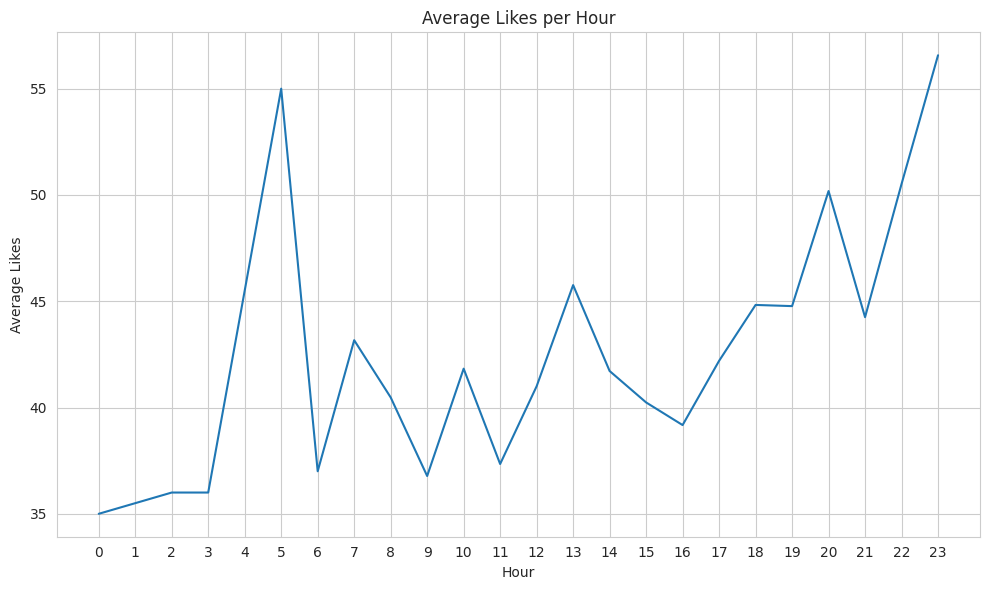

In [27]:
# Extract hour from the Timestamp
df['Hour'] = df['Timestamp'].dt.hour

# Set Seaborn style
sns.set_style("whitegrid")

# Plot average likes per hour
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Hour'], y=df['Likes'], estimator='mean', ci=None)

plt.title("Average Likes per Hour")
plt.xlabel("Hour")
plt.ylabel("Average Likes")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

Average Likes for each Plataform

<ipython-input-28-7e58e3432d0a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Platform'], y=df['Likes'], estimator='mean', palette="Set2")


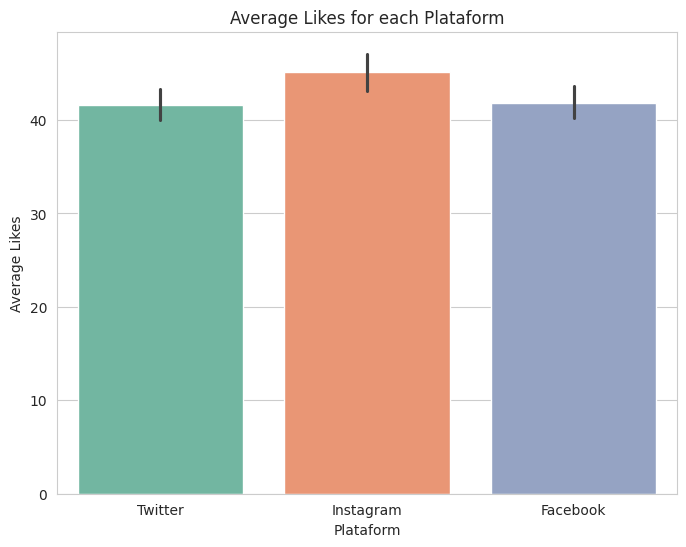

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Platform'], y=df['Likes'], estimator='mean', palette="Set2")
plt.title("Average Likes for each Plataform")
plt.xlabel("Plataform")
plt.ylabel("Average Likes")
plt.show()

Average Likes per Sentiment (Top 20)

<ipython-input-29-85a124f77d70>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_likes.index, y=avg_likes.values, palette="coolwarm")


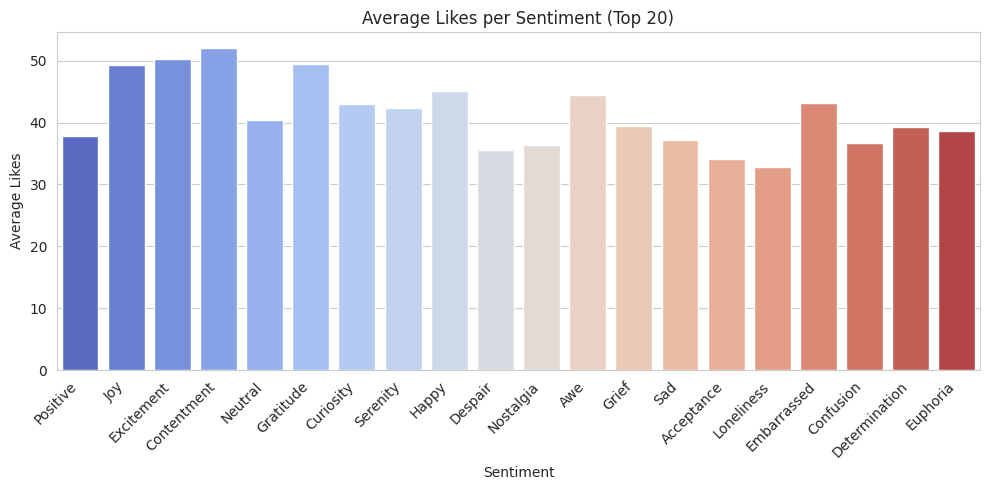

In [29]:
# Get top 20 most frequent sentiments
top_20_sentiments = df["Sentiment"].value_counts().head(20).index

# Filter the DataFrame for those sentiments
filtered_df = df[df["Sentiment"].isin(top_20_sentiments)]

# Group by Sentiment and calculate average Likes
avg_likes = filtered_df.groupby("Sentiment")["Likes"].mean().loc[top_20_sentiments]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_likes.index, y=avg_likes.values, palette="coolwarm")

plt.title("Average Likes per Sentiment (Top 20)")
plt.xlabel("Sentiment")
plt.ylabel("Average Likes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Correlation between Retweets and Likes

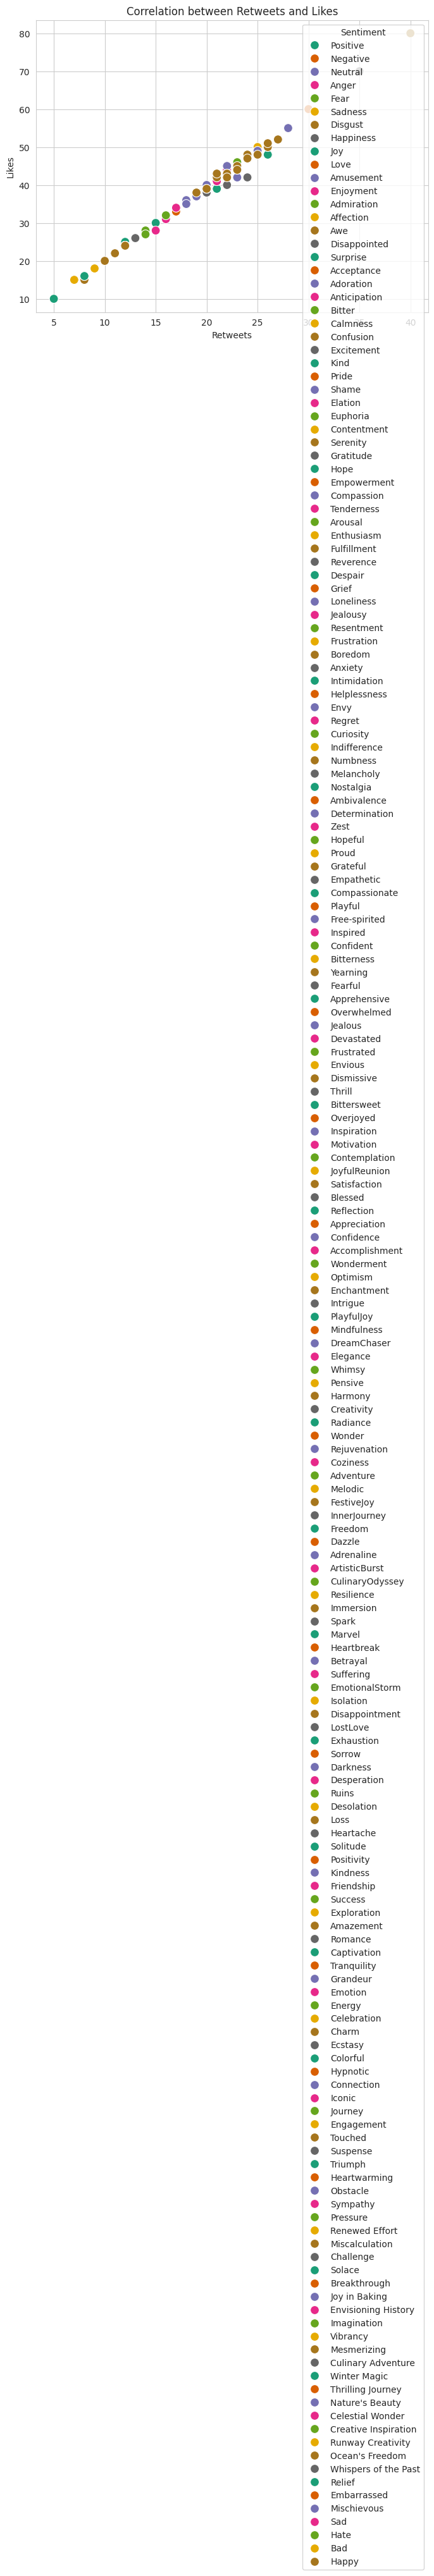

In [30]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df["Retweets"], y=df["Likes"], hue=df["Sentiment"], palette="Dark2", s=100)
plt.title("Correlation between Retweets and Likes")

plt.show()

In [31]:
print("Value counts of target variable (sentiment):")
print(df['Sentiment'].value_counts())

Value counts of target variable (sentiment):
Sentiment
Positive                45
Joy                     44
Excitement              37
Contentment             18
Neutral                 18
                        ..
Celestial Wonder         1
Nature's Beauty          1
Thrilling Journey        1
Whispers of the Past     1
Relief                   1
Name: count, Length: 191, dtype: int64


In [32]:
# Checking unique lables in sentiment column
print("Number of unique sentiment labels:", df['Sentiment'].nunique())

# Displaying sample labels from sentiment column
print("Sample sentiment labels:")
print(df['Sentiment'].unique()[:20])

Number of unique sentiment labels: 191
Sample sentiment labels:
['Positive' 'Negative' 'Neutral' 'Anger' 'Fear' 'Sadness' 'Disgust'
 'Happiness' 'Joy' 'Love' 'Amusement' 'Enjoyment' 'Admiration' 'Affection'
 'Awe' 'Disappointed' 'Surprise' 'Acceptance' 'Adoration' 'Anticipation']


In [33]:
df['Sentiment'] = df['Sentiment'].str.lower().str.strip()

valid_labels = ['positive', 'negative', 'neutral']
df = df[df['Sentiment'].isin(valid_labels)]

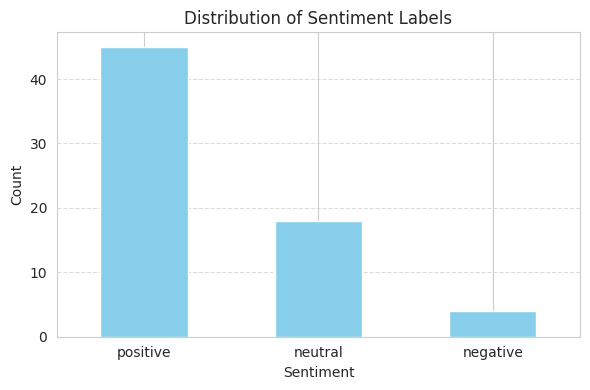

In [34]:
plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
# Create a new column to store text length
df = df[df['Sentiment'].isin(valid_labels)].copy()
df['text_length'] = df['Text'].apply(len)

In [36]:
# Desribing Text
print("Describe Text: ")
print(df['text_length'].describe())

Describe Text: 
count     67.000000
mean      62.179104
std       20.530041
min       50.000000
25%       52.000000
50%       52.000000
75%       52.000000
max      128.000000
Name: text_length, dtype: float64


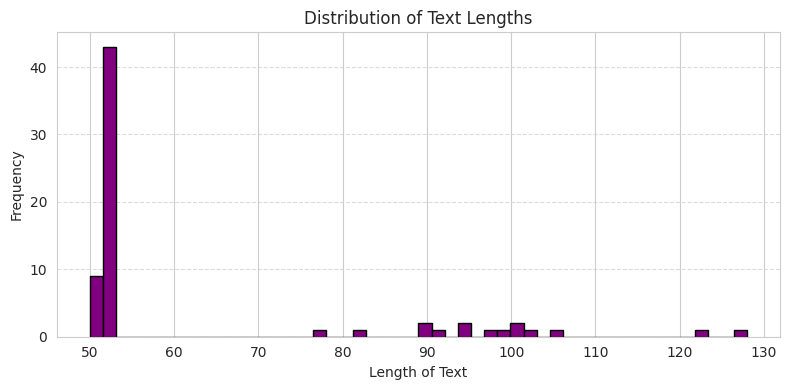

In [37]:
# Plot histogram of text lengths
plt.figure(figsize=(8,4))
plt.hist(df['text_length'], bins=50, color='purple', edgecolor='black')
plt.title("Distribution of Text Lengths")
plt.xlabel("Length of Text")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

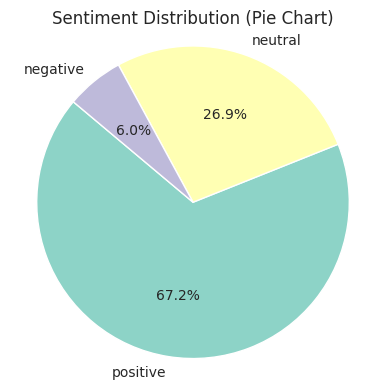

In [38]:
# Pie chart of Text lenght by sentiment category
sentiment_counts = df['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Set3.colors)

plt.title("Sentiment Distribution (Pie Chart)")
plt.axis('equal')
plt.tight_layout()
plt.show()

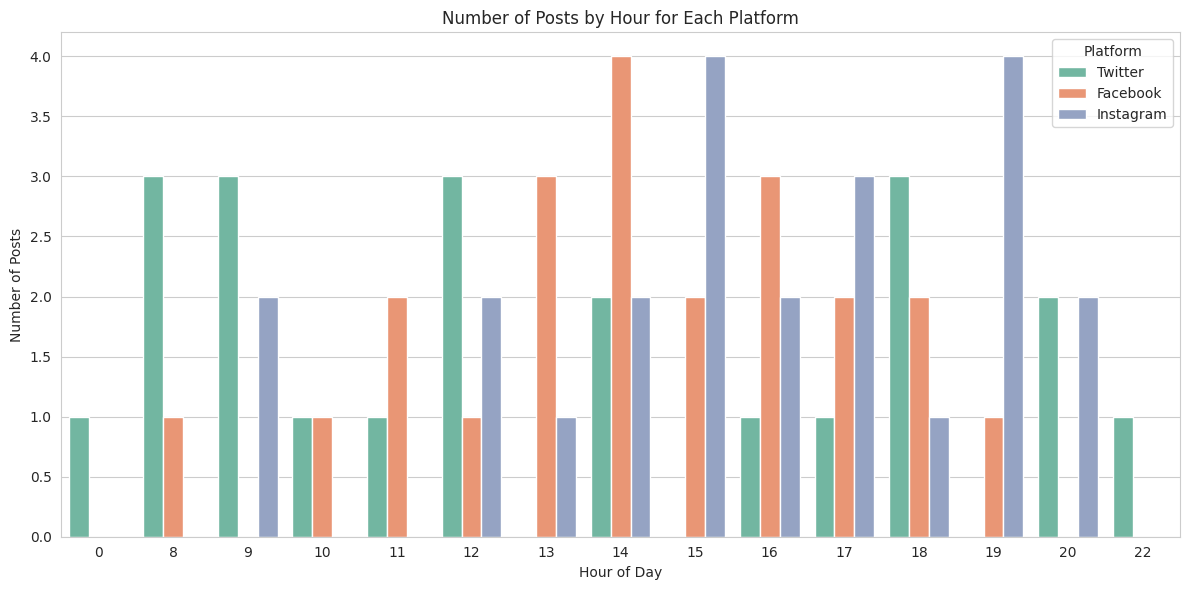

In [39]:
# Plot: Number of posts per hour per platform
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour', hue='Platform', palette='Set2')
plt.title("Number of Posts by Hour for Each Platform")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Posts")
plt.legend(title="Platform")
plt.tight_layout()
plt.show()


<ipython-input-40-021efb280d4e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Hour', y='Likes', hue='Platform', estimator='mean', ci=None, marker='o')


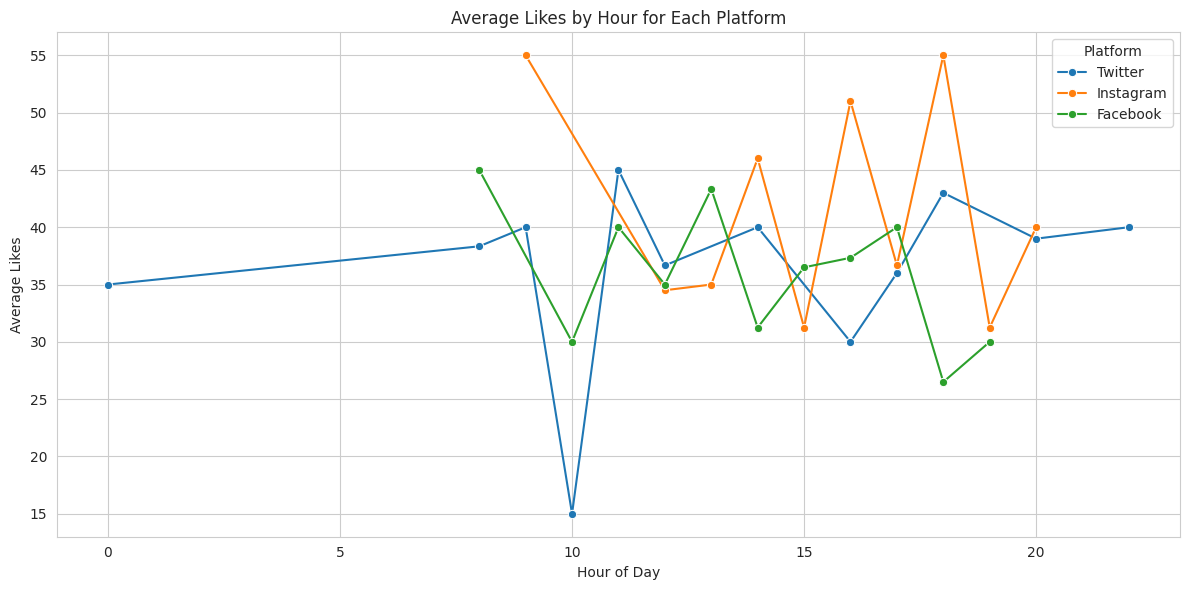

In [40]:
# Plot: Average likes per hour per platform
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Hour', y='Likes', hue='Platform', estimator='mean', ci=None, marker='o')
plt.title("Average Likes by Hour for Each Platform")
plt.xlabel("Hour of Day")
plt.ylabel("Average Likes")
plt.legend(title="Platform")
plt.tight_layout()
plt.show()

In [41]:
# 1. Most Posts Time Period (per platform)
post_peak_hours = df.groupby(['Platform', 'Hour']).size().reset_index(name='Post_Count')
post_peak = post_peak_hours.loc[post_peak_hours.groupby('Platform')['Post_Count'].idxmax()]

print("⏰ Peak Posting Hours by Platform:")
print(post_peak)

# 2. Most Liked Time Period (per platform)
like_peak_hours = df.groupby(['Platform', 'Hour'])['Likes'].mean().reset_index()
like_peak = like_peak_hours.loc[like_peak_hours.groupby('Platform')['Likes'].idxmax()]

print("\n🔥 Peak Engagement (Likes) Hours by Platform:")
print(like_peak)

⏰ Peak Posting Hours by Platform:
     Platform  Hour  Post_Count
5    Facebook    14           4
15  Instagram    15           4
22    Twitter     8           3

🔥 Peak Engagement (Likes) Hours by Platform:
     Platform  Hour  Likes
0    Facebook     8   45.0
11  Instagram     9   55.0
25    Twitter    11   45.0


In [42]:
# Calculate Reach: Likes + Retweets
df['Reach'] = df['Likes'] + df['Retweets']

# Group by Platform and Hour to find average Reach
reach_by_hour = df.groupby(['Platform', 'Hour'])['Reach'].mean().reset_index()

# Get peak reach hour per platform
peak_reach = reach_by_hour.loc[reach_by_hour.groupby('Platform')['Reach'].idxmax()]

print("📈 Peak Reach Hours by Platform (Likes + Retweets):")
print(peak_reach)

📈 Peak Reach Hours by Platform (Likes + Retweets):
     Platform  Hour  Reach
0    Facebook     8   67.0
18  Instagram    18   83.0
25    Twitter    11   67.0


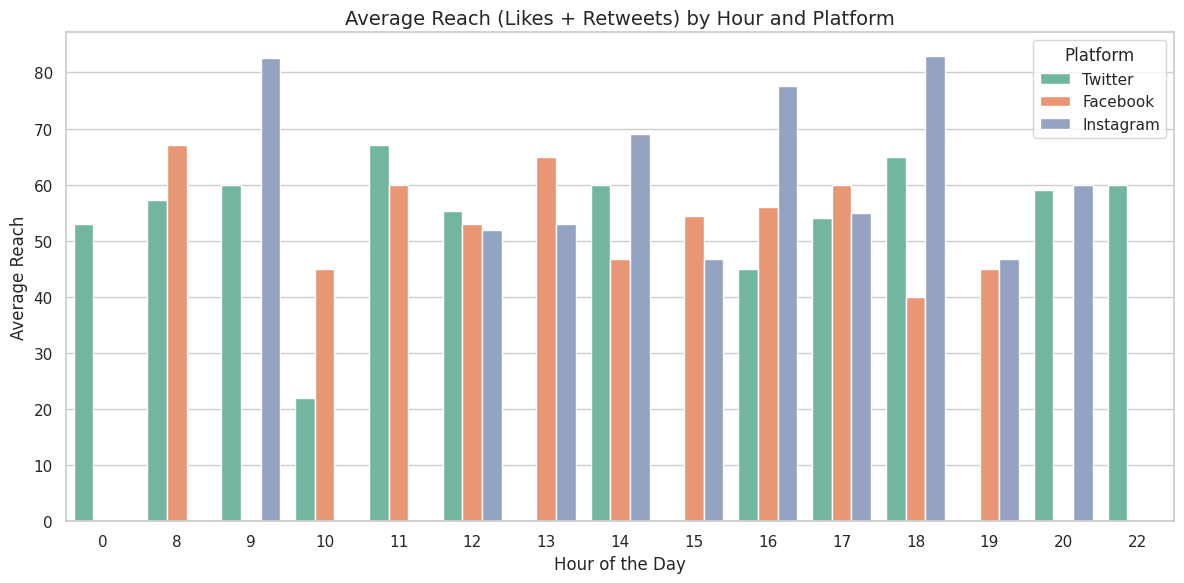

In [43]:
# Set plot style
sns.set(style='whitegrid')

# Barplot of Average Reach per Hour for Each Platform
plt.figure(figsize=(12, 6))
sns.barplot(data=reach_by_hour, x='Hour', y='Reach', hue='Platform', palette='Set2')

plt.title("Average Reach (Likes + Retweets) by Hour and Platform", fontsize=14)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Reach")
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

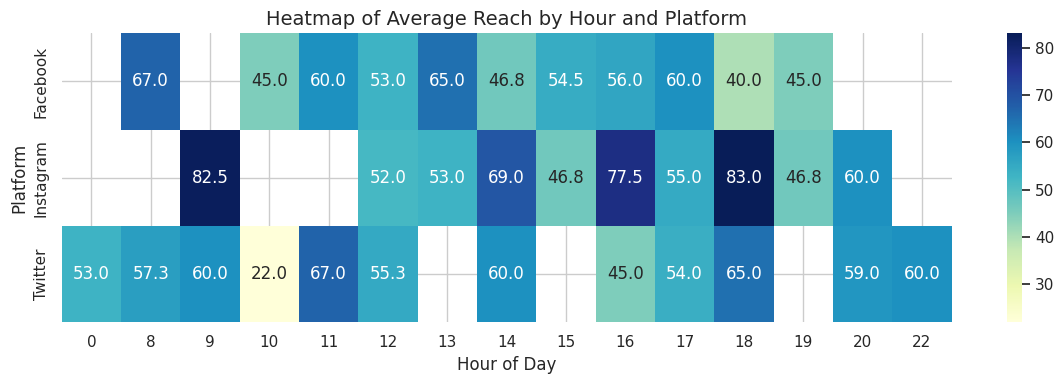

In [44]:
# Pivot table for heatmap
heatmap_data = reach_by_hour.pivot(index='Platform', columns='Hour', values='Reach')

plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")

plt.title("Heatmap of Average Reach by Hour and Platform", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Platform")
plt.tight_layout()
plt.show()

Sentiment Prediction

Naive Bayes classifier

In [49]:
# Prepare data for modeling
X = df['Text']
y = df['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [50]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

Accuracy: 0.79
              precision    recall  f1-score   support

     neutral       1.00      0.40      0.57         5
    positive       0.75      1.00      0.86         9

    accuracy                           0.79        14
   macro avg       0.88      0.70      0.71        14
weighted avg       0.84      0.79      0.76        14



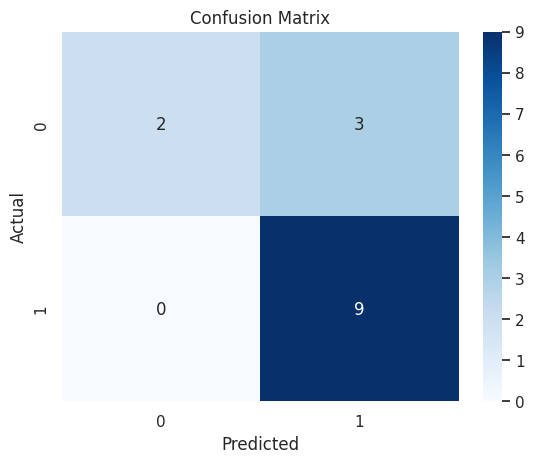

In [51]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

TF-IDF + Logistic Regression¶

In [52]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Evaluate
y_pred = model.predict(X_test_vec)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.79
              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00         5
    positive       0.64      1.00      0.78         9

    accuracy                           0.64        14
   macro avg       0.32      0.50      0.39        14
weighted avg       0.41      0.64      0.50        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest

In [53]:
# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.2f}')
# Classification report
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.64
              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00         5
    positive       0.64      1.00      0.78         9

    accuracy                           0.64        14
   macro avg       0.32      0.50      0.39        14
weighted avg       0.41      0.64      0.50        14



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Conclusion¶**


After testing different sentiment classification models, we observed significant variations in accuracy:

**Naive Bayes** achieved **22%** accuracy, indicating that the model struggled to capture meaningful patterns from the text.

**TF-IDF + Logistic Regression** also reached **22%,** suggesting that while TF-IDF is a more advanced vectorization method, logistic regression did not provide significant improvements in this case.

**Random Forest** achieved **42%** accuracy, making it the best-performing model among those tested. This suggests that it was better at capturing relationships between words and sentiments, even without using deep learning techniques.

Next Steps

Tune hyperparameters of the Random Forest model to explore potential improvements.

Test more advanced models, such as neural networks (LSTM, Transformers), to see if they can surpass the 42% accuracy.

Explore data augmentation and preprocessing techniques, such as removing irrelevant words, to enhance model performance.

Conclusion: Random Forest emerged as the most effective model, but there is room for optimization and experimentation with more advanced approaches.